# Finding the Causes of Heavy Traffic on I-94

## Table of Contents

1. [Introduction](#introduction)
2. [Opening the File](#open_file)
3. [Exploring Traffic Volume Distribution](#exploring_traffic)
4. [Finding How Time Affects Traffic Volume](#time_traffic)
 * Comparing Daytime and Nighttime Traffic Volume
 * Finding How Traffic Volume Changes During Different Months
 * Finding How Traffic Volume Changes During Different Days of the Week
 * Finding How Traffic Volume Changes During the Day
5. [Finding How Weather Affects Traffic Volume](#traffic_by_weather)
6. [Conclusion](#conclusion)

## Introduction <a name='introduction'></a>

In this project we are going to analyze a dataset about the westbound traffic on [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Opening the File <a name='open_file'></a>

As for our first step we are going to import some modules. They'll help us in our research.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, we are ready to open the dataset.

In [2]:
# open the file
traffic = pd.read_csv('C:/Users/feelingcxld Study/my_datasets/Metro_Interstate_Traffic_Volume.csv')

Down here you can see our dataset. Let's first get familiar with the columns.

In [3]:
# explore first and last 5 rows
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


* `holiday`: US National holidays plus regional holiday, Minnesota State Fair
* `temp`: Average temp in kelvin
* `rain_1h`: Amount in mm of rain that occurred in the hour
* `snow_1h`: Amount in mm of snow that occurred in the hour
* `clouds_all`: Percentage of cloud cover
* `weather_main`: Short textual description of the current weather
* `weather_description`: Longer textual description of the current weather
* `date_time`: Hour of the data collected in local CST time
* `traffic_volume`: Hourly I-94 ATR 301 reported westbound traffic volume

In [4]:
# explore columns info
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Above we can see that our dataset has 48,204 rows and 9 columns. We are also don't have empty entries in our dataset. Only one thing that we can change from the first look is to convert `date_time` column to a `datetime` datatype.

## Exploring Traffic Volume Distribution <a name='exploring_traffic'></a>

Let's create a traffic volume histogram to look at its distribution.

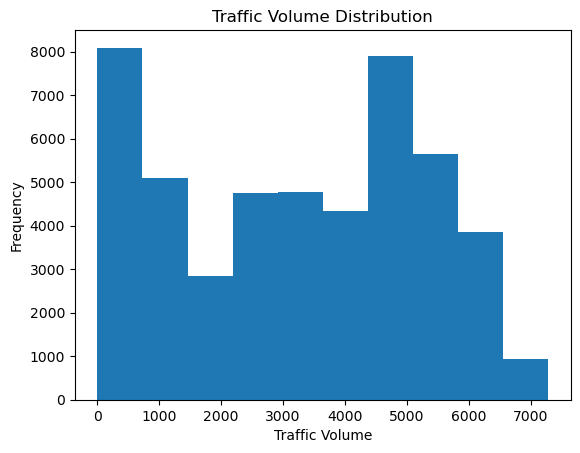

In [5]:
# create traffic volume histogram 
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.show()

In [6]:
# explore traffic_volume column description
print(traffic['traffic_volume'].describe())

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


We can see that about 25% of the time there were 1193 cars passing the station each hour. This probably occurs during the night, or when a road is under construction.

There's also about 25% of the time the traffic volume was at more than four times as much.

## Finding How Time Affects Traffic Volume <a name='time_traffic'></a>

### Comparing Daytime and Nighttime Traffic Volume <a name='compare_day_night'></a>

Now, let's find out how time of the day affects traffic volume.

In [7]:
# convert date_time column to datetime format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

First, we need to separate daytime entries from nighttime. We are going to use intervals from 7a.m. to 7p.m. for daytime and for nighttime from 7p.m. to 7a.m.

In [8]:
# isolate daytime from 7a.m. to 7p.m. and nighttime from 7p.m. to 7a.m.
day = traffic[(traffic['date_time'].dt.hour > 6) & (traffic['date_time'].dt.hour < 19)].copy()
night = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour > 18)].copy()

In [9]:
# isolate number of entries in day and night dfs
day_entries = day.shape[0]
night_entries = night.shape[0]

print(f'Daytime entries: {day_entries:,}')
print(f'Nighttime entries: {night_entries:,}')

Daytime entries: 23,877
Nighttime entries: 24,327


There are 23,877 entries for daytime and 24,327 entries for nighttime.

Now, let's take a look at two histograms for traffic volume during daytime and nighttime.

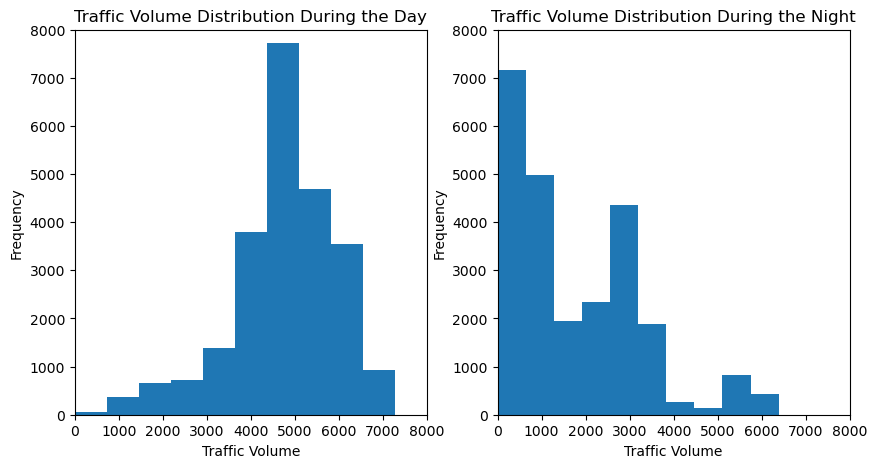

In [10]:
# create 2 histograms for traffic volume
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume Distribution During the Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume Distribution During the Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.show()

In [11]:
print(day['traffic_volume'].describe())
print(night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


We can see that during traffic volume the day is almost three times as much on average than during nighttime. 4,762 on average for daytime and 1,785 on average for nighttime.

Since our goal is to determine the indicators of the heavy traffic, we will focus on the daytime data.

### Finding How Traffic Volume Changes During Different Months <a name='traffic_by_month'></a>

For our next step, let's find out how traffic changes during different months.

In [12]:
# create new column 'month' and store df mean values grouped by month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()

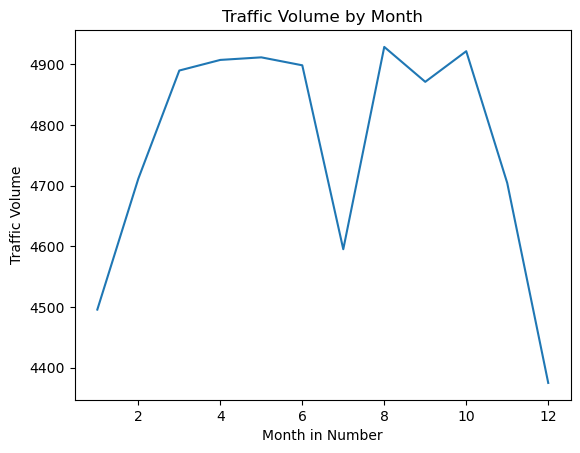

In [13]:
# create traffic volume by month line graph
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Month')
plt.xlabel('Month in Number')
plt.ylabel('Traffic Volume')
plt.show()

Looking at this graph, we can say that from March to October traffic volume is higher than from November to February.

### Finding How Traffic Volume Changes During Different Days of the Week <a name='traffic_by_dayofweek'></a>

Now, we are going to find out how different days of the week affect traffic volume.

In [14]:
# create new column 'dayofweek' and store df mean values grouped by day of the week
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()

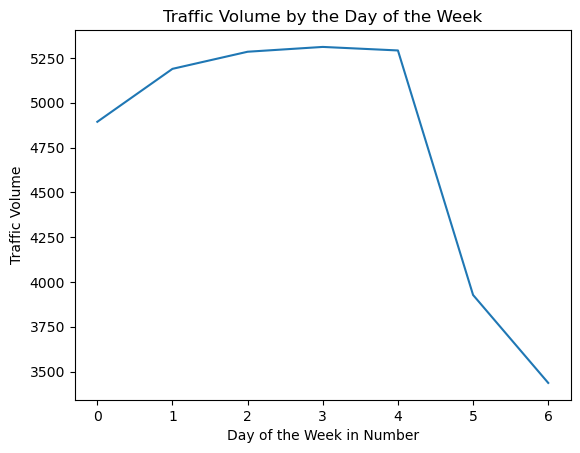

In [15]:
# create traffic volume by day of the week line graph
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume by the Day of the Week')
plt.xlabel('Day of the Week in Number')
plt.ylabel('Traffic Volume')
plt.show()

In [16]:
# store mean value for weekdays and weekends
weekday_mean = by_dayofweek['traffic_volume'][:5].mean()
weekend_mean = by_dayofweek['traffic_volume'][5:].mean()

print(f'Average traffic volume during weekdays: {round(weekday_mean):,}')
print(f'Average traffic volume during weekends: {round(weekend_mean):,}')

Average traffic volume during weekdays: 5,194
Average traffic volume during weekends: 3,682


We can see that during weekdays traffic volume is much higher than on weekends. For weekdays, traffic volume is around 5,194 on average. For weekends, traffic volume is around 3,682 on average.

### Finding How Traffic Volume Changes During the Day <a name='traffic_by_hour'></a>

Let's find out how traffic volume changes during the day. As we know that during weekdays traffic volume is much higher than during weekends, we are going to separate them.

In [17]:
# create new column 'hour'
day['hour'] = day['date_time'].dt.hour
# create two new df with only weekdays and weekends
weekday = day[day['dayofweek'] <= 4].copy() # 4 == Friday
weekend = day[day['dayofweek'] >= 5].copy() # 5 == Saturday
# store df mean values grouped by hour
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

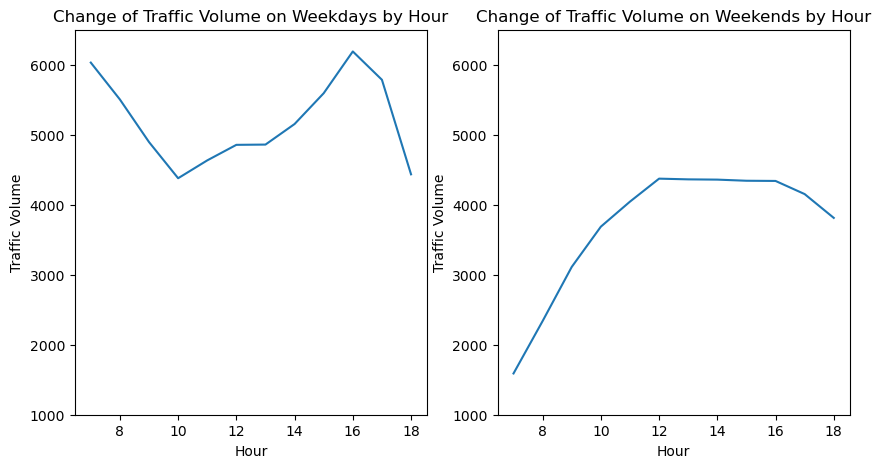

In [18]:
# create 2 traffic volume line charts for weekdays and weekends
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(by_hour_weekday['traffic_volume'])
plt.title('Change of Traffic Volume on Weekdays by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(1000, 6500)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Change of Traffic Volume on Weekends by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(1000, 6500)

plt.show()

In [19]:
# store mean value for weekdays and weekends rush hour
weekday_rush_hour_mean = round(by_hour_weekday['traffic_volume'][0:10].mean())
weekend_rush_hour_mean = round(by_hour_weekend['traffic_volume'][5:10].mean())

print(f'The average traffic volume during rush hour on weekdays: {weekday_rush_hour_mean:,}')
print(f'The average traffic volume during rush hour on weekends: {weekend_rush_hour_mean:,}')

The average traffic volume during rush hour on weekdays: 5,209
The average traffic volume during rush hour on weekends: 4,355


Based on these graphs, we can say that the rush hour on weekdays lasts from 7:00 a.m. to 4:00 p.m with 5,209 traffic volume on average. On weekends, the rush hour lasts from 12:00p.m. to 4:00 p.m. with 4,355 traffic volume on average.

## Finding How Weather Affects Traffic Volume <a name='traffic_by_weather'></a>

One of the reasons of heavy traffic may be the weather. In our dataset we have numerical and categorical types of weather data. Let's take a look at the correlations between numerical weather data and traffic volume.

In [20]:
# explore correlations between traffic volume and numeric weather columns
print(day.corr()['traffic_volume']['temp':'clouds_all'])

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64


Correlation between all numerical weather data is about neutral, so let's take a look at the second type of weather data.

In [21]:
# store df mean values grouped by 'weather_main' and 'weather_description' columns
by_weather_main = day.groupby('weather_main').mean()
by_weather_desc = day.groupby('weather_description').mean()

One of the categorical columns about the weather is `weather_main`. This column contains a short textual description of the current weather. Let's take a look at the graph below.

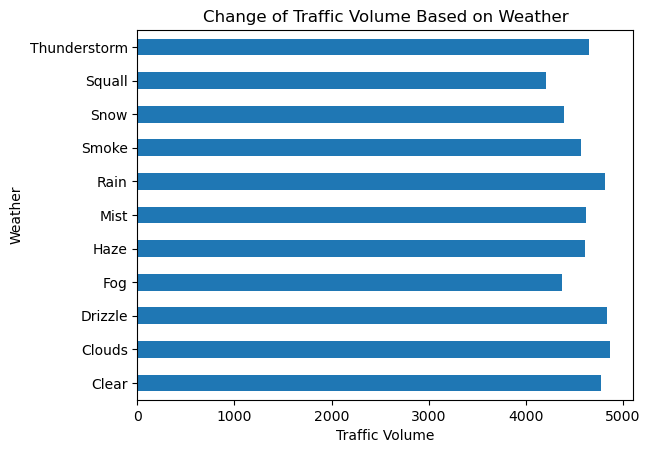

In [22]:
# create traffic volume by weather bar chart
by_weather_main['traffic_volume'].plot.barh()
plt.title('Change of Traffic Volume Based on Weather')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

We can't really say anything by the look at this graph. All bars are pretty equal. Let's take a look at the second categorical column then.

Our second categorical column called `weather_descriprion`. This column contains a longer textual description of the current weather. Let's look at the graph below.

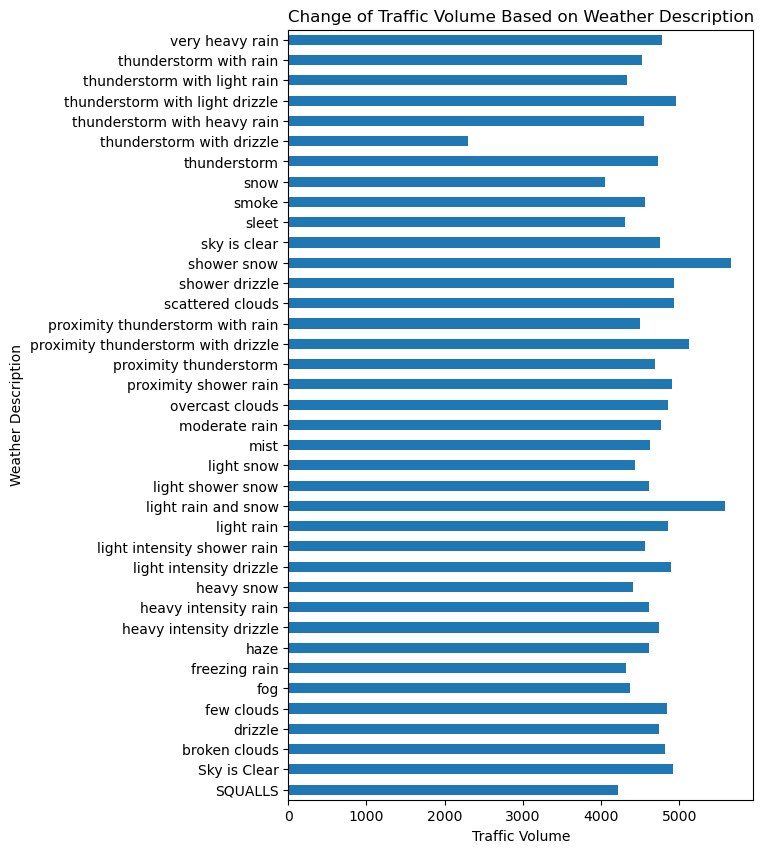

In [23]:
# create traffic volume by weather description bar chart
by_weather_desc['traffic_volume'].plot.barh(figsize=(6, 10))
plt.title('Change of Traffic Volume Based on Weather Description')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

In [24]:
print('Weather with the most traffic value:')
for weather, val in zip(by_weather_desc['traffic_volume'].sort_values(ascending=False).head(3).index,
                        by_weather_desc['traffic_volume'].sort_values(ascending=False).head(3)):
    print(f'During the \'{weather.title():}\' the average traffic volume is {round(val):,}')

Weather with the most traffic value:
During the 'Shower Snow' the average traffic volume is 5,664
During the 'Light Rain And Snow' the average traffic volume is 5,580
During the 'Proximity Thunderstorm With Drizzle' the average traffic volume is 5,122


By the look at this graph, we can say that causes of heavy traffic are **shower snow** with 5,664 traffic volume on average, **light rain and snow** with 5,580 traffic volume on average and **proximity thunderstorm with drizzle** with 5,122 traffic volume on average.

## Conclusion <a name='conclusion'></a>

The main goal of this project was to determine a few indicators of heavy traffic on I-94. Throughout this project we found out that traffic is influenced by two indicators. First is the time, and the second is weather.

For the time indicators we found out that from March to October traffic volume is higher than from November to February. We also know that during weekdays traffic volume is heavier compared to weekends.

As for weather indicators, we found out that **shower snow**, **light rain and snow** and **proximity thunderstorm with drizzle** have the strongest impact on traffic.